1. Extract All Unique Words from Ingredients
First, collect all unique words from both Hindi and English ingredient columns.

In [1]:
import pandas as pd
import re

df = pd.read_csv("IndianFoodDatasetCSV.csv")

def tokenize(text):
    if not isinstance(text, str):
        return []
    # Split on commas, semicolons, newlines, and spaces
    words = re.split(r'[,;\n\s]+', text.lower())
    # Remove empty and numeric tokens
    return [w for w in words if w and not w.isdigit()]

# Collect all words from both columns
all_words = set()
for col in ["Ingredients", "TranslatedIngredients"]:
    df[col] = df[col].fillna("")
    for line in df[col]:
        all_words.update(tokenize(line))

print(f"Total unique words in ingredients: {len(all_words)}")
print("Sample words:", list(all_words)[:30])

Total unique words in ingredients: 4585
Sample words: ['robusta', 'milagai', 'pani', 'keerai)', 'खस', 'cheetos', '(विनेगर)', 'lengths', 'pesarattu', 'paprika)', 'चमचच', 'toppings', 'two', 'podi', 'ल', 'लिए', 'standard', 'foot', 'semolina', 'prawns', 'ढोले', 'diced', 'sooji', 'bitter', 'ball', '(firm)', '/jam', '(beetroot)', '(mahali', '(baby']


2. Find Stopwords in Ingredients
You can compare your ingredient words to standard stopword lists. Here’s an example using NLTK for English and a basic Hindi list.

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

en_stopwords = set(stopwords.words('english'))
hi_stopwords = set([
    "और", "का", "की", "के", "से", "को", "पर", "में", "है", "यह", "था", "थे", "तो", "भी", "हो", "कि", "जो", "तक", "जब", "या", "एक", "लेकिन", "अपने", "लिए", "इसे", "इस", "उस", "उन", "उनके", "उनकी", "उनका"
])

ingredient_stopwords = set()
for word in all_words:
    if word in en_stopwords or word in hi_stopwords:
        ingredient_stopwords.add(word)

print(f"Stopwords found in ingredients: {ingredient_stopwords}")

Stopwords found in ingredients: {'each', 'an', 'was', 'की', 'but', 'we', 'लिए', 'को', 'very', 'been', 'then', 'such', 'into', 'है', 'should', 'i', 'down', 'o', 'about', 'to', 'एक', 'this', 'it', 'in', 'so', 'भी', 'how', 'which', 'can', 'of', 'का', 'your', 'a', 'the', 'now', 'off', 'या', 'and', 'will', 'have', 'more', 'from', 'same', 's', 'after', 'if', 'or', 'few', 'से', 'while', 'तक', 'here', 'that', 'both', 'too', 'at', 'other', 'not', 'do', 'when', 'be', 'up', "don't", 'its', 'are', 'और', 'इस', 'में', 'on', 'any', 'above', 'than', 'पर', 'some', 'all', 'अपने', 'के', 'with', 'for', 'until', 'you', 'as', 'before', 'during', 'over', 'them', 'just', 'no', 'out', 'is', 'only', 'by', 't', 'between'}


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hvish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Stopwords found in ingredients: {'each', 'an', 'was', 'की', 'but', 'we', 'लिए', 'को', 'very', 'been', 'then', 'such', 'into', 'है', 'should', 'i', 'down', 'o', 'about', 'to', 'एक', 'this', 'it', 'in', 'so', 'भी', 'how', 'which', 'can', 'of', 'का', 'your', 'a', 'the', 'now', 'off', 'या', 'and', 'will', 'have', 'more', 'from', 'same', 's', 'after', 'if', 'or', 'few', 'से', 'while', 'तक', 'here', 'that', 'both', 'too', 'at', 'other', 'not', 'do', 'when', 'be', 'up', "don't", 'its', 'are', 'और', 'इस', 'में', 'on', 'any', 'above', 'than', 'पर', 'some', 'all', 'अपने', 'के', 'with', 'for', 'until', 'you', 'as', 'before', 'during', 'over', 'them', 'just', 'no', 'out', 'is', 'only', 'by', 't', 'between'}


3. Remove These Stopwords from Steps/Transitions
Now, use ingredient_stopwords to clean your step texts or transitions:

In [7]:
import networkx as nx

# Load the combined graph from your GraphML file
G_all = nx.read_graphml("all_recipes.graphml")
def remove_ingredient_stopwords(text):
    words = re.findall(r'\w+', text.lower())
    filtered = [w for w in words if w not in ingredient_stopwords]
    return ' '.join(filtered)

# Example usage for transitions:
transition_counter = Counter()
for u, v in G_all.edges():
    u_text = G_all.nodes[u].get("text", "").lower()
    v_text = G_all.nodes[v].get("text", "").lower()
    u_clean = remove_ingredient_stopwords(u_text)
    v_clean = remove_ingredient_stopwords(v_text)
    if u_clean and v_clean:
        transition_counter[(u_clean, v_clean)] += 1

print(f"{'From Step':<50} {'→':^3} {'To Step':<50} {'Count':>8}")
print("-" * 120)
for (u, v), count in transition_counter.most_common(15):
    print(f"{u[:48]:<50} → {v[:48]:<50} {count:>8}")

From Step                                           →  To Step                                               Count
------------------------------------------------------------------------------------------------------------------------
keep aside                                         → heat oil pan                                             42
अलग स रख द                                         → अब कढ़ ई म त ल गरम कर                                     11
heat oil pan                                       → add mustard seeds let splutter                            9
heat oil pan                                       → add mustard seeds let cook 10 seconds                     8
heat oil pan                                       → add cumin seeds let splutter                              7
heat oil pan                                       → add onions cook till they become soft                     6
keep separately                                    → heat oil pan                     

# 🍳 Compare above output with previous transition without removing stop words

This table compares common step-to-step transitions found across multiple recipes, in both English and Hindi. Each row shows how often a specific transition appears.

| Step 1                                                                 | → Step 2                                                                                                                | Frequency |
|------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------|-----------|
| keep it aside                                                          | now heat oil in a pan                                                                                                   | 29        |
| अलग से रख दे                                                           | अब एक कढ़ाई में तेल गरम करें                                                                                            | 11        |
| keep it aside                                                          | heat oil in a pan                                                                                                       | 8         |
| now heat oil in a pan                                                  | add mustard seeds and let it cook for 10 seconds                                                                        | 7         |
| once fermented, give it a stir gently                                  | you can make idli the first day when batter is fresh with air pockets                                                   | 6         |
| place the rolled paratha on top and allow it to cook on one side      | after about 10 to 15 seconds, flip the paratha. At this stage, smear some oil or ghee to cook the paratha               | 6         |
| now heat oil in a pan                                                  | add mustard seeds and let it splutter                                                                                   | 5         |
| अलग से रख ले                                                           | एक कढ़ाई में तेल गरम करें                                                                                               | 5         |
| एक कढ़ाई में तेल गरम करें                                             | इसमें राइ डाले और तड़कने दे                                                                                             | 5         |
| place the steamer on high heat and steam the idli’s for 10 minutes     | after 10 minutes of steaming, turn off the heat → open the steamer and insert a knife or a pick to test idli doneness   | 5         |
| in another bowl, soak the rice                                         | soak them for at least 6 hours or overnight. Once soaked, you can grind them                                            | 5         |
| अलग से रख दे                                                           | एक कढ़ाई में तेल गरम करें                                                                                               | 5         |
| अब एक कढ़ाई में तेल गरम करें                                          | इसमें जीरा डाले और तड़कने दे                                                                                            | 5         |
| while grinding add just enough water to make it into a very smooth batter | the batter will look fluffy                                                                                              | 5         |
| keep the chopped tomatoes aside. In a large saucepan, heat olive oil  | add the chopped garlic and onions                                                                                       | 4         |

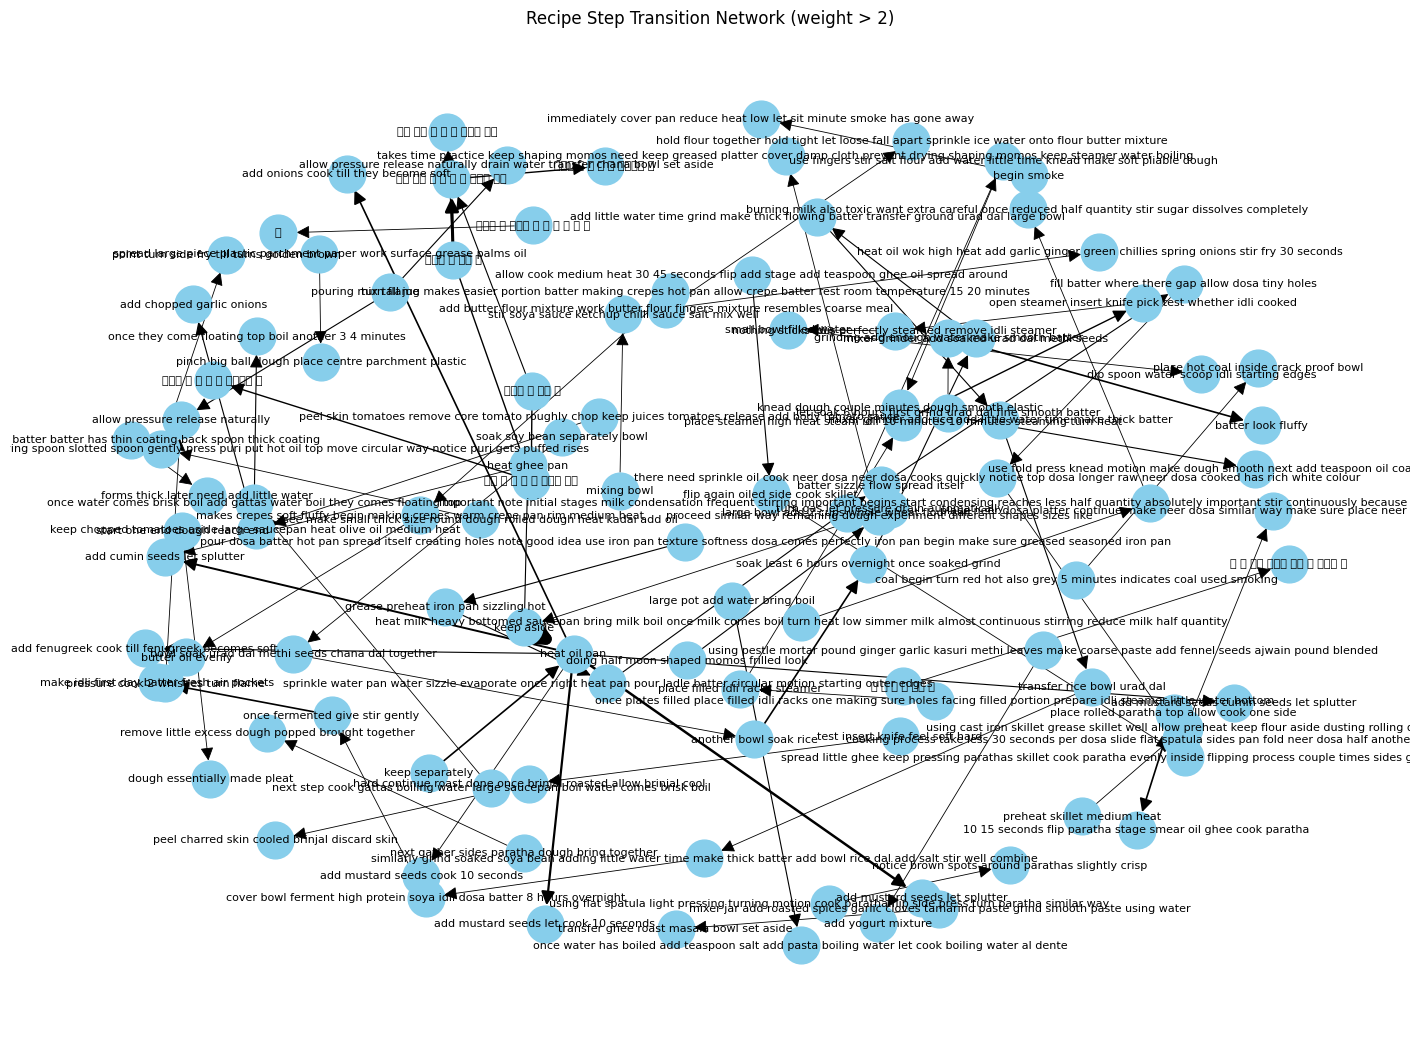

In [11]:
import matplotlib.pyplot as plt

# Build directed graph from transitions with weight > 2
G_trans = nx.DiGraph()
for (u, v), w in transition_counter.items():
    if w > 2:
        G_trans.add_edge(u, v, weight=w)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_trans, k=0.7, seed=42)
edges = G_trans.edges()
weights = [G_trans[u][v]['weight'] for u, v in edges]
nx.draw(
    G_trans, pos, with_labels=True, node_size=700, node_color='skyblue',
    arrowsize=20, width=[w/5 for w in weights], font_size=8
)
plt.title("Recipe Step Transition Network (weight > 2)")
plt.show()

Nodes = unique (cleaned) recipe steps  
Edges = transitions between steps  
Edge weights = frequency of that transition across recipes  
Number of nodes: 114  
Number of edges: 84

In [12]:
pr = nx.pagerank(G_trans, weight='weight')
print("Top 10 steps by PageRank:")
for step, score in sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{step[:48]:<50} {score:.4f}")

Top 10 steps by PageRank:
make idli first day batter fresh air pockets       0.0242
once fermented give stir gently                    0.0235
cover bowl ferment high protein soya idli dosa b   0.0226
similarly grind soaked soya bean adding little w   0.0217
place neer dosa platter continue make neer dosa    0.0205
transfer rice bowl urad dal                        0.0205
dip spoon water scoop idli starting edges          0.0192
cooking process take less 30 seconds per dosa sl   0.0192
mixer grinder add rice add little water time mak   0.0192
small bowl filled water                            0.0176


In [13]:
in_deg = G_trans.in_degree(weight='weight')
out_deg = G_trans.out_degree(weight='weight')

print("\nTop 10 steps by in-degree (most common as next step):")
for node, deg in sorted(in_deg, key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node[:48]:<50} {deg}")

print("\nTop 10 steps by out-degree (most common as previous step):")
for node, deg in sorted(out_deg, key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node[:48]:<50} {deg}")


Top 10 steps by in-degree (most common as next step):
heat oil pan                                       48
अब कढ़ ई म त ल गरम कर                               15
कढ़ ई म त ल गरम कर                                  10
add cumin seeds let splutter                       10
add mustard seeds let splutter                     9
add mustard seeds let cook 10 seconds              8
allow pressure release naturally                   7
add onions cook till they become soft              6
soak least 6 hours overnight once soaked grind     6
make idli first day batter fresh air pockets       6

Top 10 steps by out-degree (most common as previous step):
keep aside                                         46
heat oil pan                                       41
अलग स रख द                                         20
अलग स रख ल                                         9
turn flame                                         8
keep separately                                    6
another bowl soak rice        

In [14]:
from networkx.algorithms.community import greedy_modularity_communities

G_undirected = G_trans.to_undirected()
communities = list(greedy_modularity_communities(G_undirected))
print(f"Found {len(communities)} communities.")
for i, comm in enumerate(communities[:5]):
    print(f"Community {i+1}: {list(comm)[:10]} ...")

Found 32 communities.
Community 1: ['add mustard seeds let splutter', 'add cumin seeds let splutter', 'add mustard seeds cook 10 seconds', 'add mustard seeds cumin seeds let splutter', 'add fenugreek cook till fenugreek becomes soft', 'heat oil pan', 'add mustard seeds let cook 10 seconds', 'keep aside', 'heat ghee pan', 'add onions cook till they become soft'] ...
Community 2: ['mixer grinder add rice add little water time make thick batter', 'mixer grinder add soaked urad dal methi seeds', 'transfer rice bowl urad dal', 'bowl soak urad dal methi seeds chana dal together', 'another bowl soak rice', 'make idli first day batter fresh air pockets', 'once fermented give stir gently', 'similarly grind soaked soya bean adding little water time make thick batter add bowl rice dal add salt stir well combine', 'soak soy bean separately bowl', 'cover bowl ferment high protein soya idli dosa batter 8 hours overnight'] ...
Community 3: ['sprinkle water pan water sizzle evaporate once right heat p

In [15]:
print("Number of nodes:", G_trans.number_of_nodes())
print("Number of edges:", G_trans.number_of_edges())
print("Density:", nx.density(G_trans))
print("Number of strongly connected components:", nx.number_strongly_connected_components(G_trans))

Number of nodes: 114
Number of edges: 84
Density: 0.006520726595249185
Number of strongly connected components: 114
